# PyTorch: Aprendiendo Fashion-MNIST

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

# **Ejercicio 1)**
Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [ ]:
# 1.0)
!pip3 install torch torchvision torchaudio torchviz

In [1]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

In [2]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import sklearn as skl
import pandas as pd
#import dill
import json

In [3]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [6]:
# Extra
from tqdm.notebook import tqdm
import time
from sklearn.metrics import ConfusionMatrixDisplay
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
BASE_PATH = "/content/drive/MyDrive/RedesNeuronalesTP2"
EXPERIMENTS_PATH = os.path.join(BASE_PATH, "experiments")
os.makedirs(EXPERIMENTS_PATH, exist_ok=True)

# **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores al rango [0,1]) los conjuntos de entrenamiento y testeo de FashionMNIST.

In [8]:
transform = Compose([
    ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [9]:
training_data = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform,
)

test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform,
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.9MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 172kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.08MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.39MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [10]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [11]:
dir(training_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [12]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
type(training_data.data)

torch.Tensor

In [14]:
print(f"training_data shape: {training_data.data.shape}")
print(f"test_data shape:     {test_data.data.shape}")

training_data shape: torch.Size([60000, 28, 28])
test_data shape:     torch.Size([10000, 28, 28])


* En el conjunto de entrenamiento, tenemos 60000 imágenes de 28 x 28 píxeles.
* En el conjunto de test, tenemos 10000 imágenes de 28 x 28 píxeles.

Notar que como solamente hay dos dimensiones (ancho y alto), tenemos píxeles en blanco y negro. De hecho, si vemos un elemento particular:

In [15]:
training_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

Vemos que son todos valores entre 0 y 255, que es la escala de blanco y negro.

**Aclaración**: en `training_data.data` tenemos las imagenes originales, SIN las transformaciones.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

In [16]:
type(training_data[0])

tuple

In [17]:
training_data[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [18]:
type(training_data[0][0])

torch.Tensor

In [19]:
training_data[0][0].shape

torch.Size([1, 28, 28])

In [20]:
type(training_data[0][1])

int

In [21]:
training_data[0][1]

9

In [22]:
training_data.targets[0]

tensor(9)

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

Referencia: [GitHub de FashionMNIST - Sección Labels](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#labels)

In [23]:
classes_dict = dict(enumerate(training_data.classes))
classes_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

Fuente: [PyTorch Basics - Iterating and Visualizing the Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#iterating-and-visualizing-the-dataset).

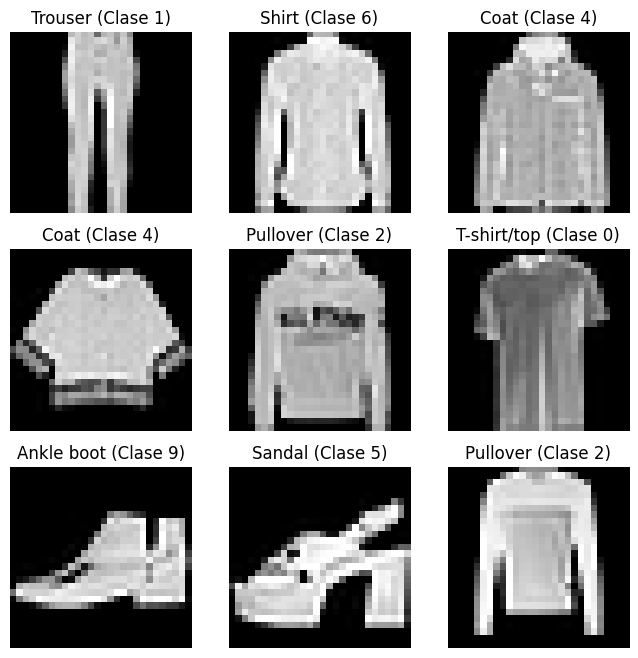

In [24]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    # Adds a subplot at position i
    figure.add_subplot(rows, cols, i)
    plt.title(f"{classes_dict[label]} (Clase {label})")
    plt.axis("off")
    # The squeeze() function removes any dimensions with size 1 from the tensor
    # or array.
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# **Ejercicio 3)**

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.




Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

Fuente: [PyTorch Basics - Preparing your data for training with DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders).

**Principal uso de `DataLoader`**: The `Dataset` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to speed up data retrieval. `DataLoader` is an iterable that abstracts this complexity for us in an easy API.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

In [25]:
batch_size = 100

In [26]:
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_dataloader  = DataLoader(test_data,     batch_size=batch_size, shuffle=True)

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

In [27]:
print(f"Amount of batches of size {batch_size} in training: {len(train_dataloader)}")
print(f"Amount of batches of size {batch_size} in test:     {len(valid_dataloader)}")

Amount of batches of size 100 in training: 600
Amount of batches of size 100 in test:     100


In [28]:
elem = next(iter(train_dataloader))

print(type(elem))   # <- It's a list
print(len(elem))    # <- It has two elements
print(type(elem[0]))    # <- It's a tensor
print(type(elem[1]))    # <- It's a tensor

elem0 = elem[0]
elem1 = elem[1]
print(elem0.shape)  # <- [100, 1, 28, 28] = [batch_size, _, width, height]
print(elem1.shape)  # <- [100] = [batch_size]

elem00 = elem0[0]
elem10 = elem1[0]
print(elem00.shape) # <- [1, 28, 28]
print(elem10)       # <- tensor(3) = label of the first element of the first batch

<class 'list'>
2
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([1, 28, 28])
tensor(1)


Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape:  torch.Size([100])


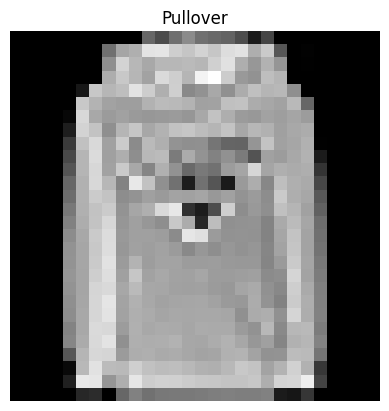

Label: 2


In [29]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape:  {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.title(classes_dict[label.item()])
plt.axis("off")
plt.show()

print(f"Label: {label}")

# **Ejercicio 4)**

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [30]:
class NeuralNetwork(nn.Module):
    def __init__(self, n1, n2, p, activation=nn.ReLU()):
        super().__init__()
        self.flatten = nn.Flatten()
        self.backbone = nn.Sequential(
            # Input Layer
            nn.Linear(28*28, n1),
            activation,
            nn.Dropout(p),

            nn.Linear(n1, n2),
            activation,
            nn.Dropout(p),

            # Output Layer
            nn.Linear(n2, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.backbone(x)
        return logits

# **Ejercicio 5)**
Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

Now that we have a model and data it's time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters (as we saw in the previous section), and optimizes these parameters using gradient descent. (Fuente: [Optimizing Model Parameters
](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html))

In [31]:
def train_step(model, dataloader, loss_fn, optimizer):
    """
    Trains the model for ONE epoch = goes over the dataset one time using the batches.
    """
    num_batches = len(dataloader)
    model_device = next(model.parameters()).device
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Move X and y to the model device
        X, y = X.to(model_device), y.to(model_device)

        # Compute prediction and loss for the batch
        y_pred = model(X)
        loss = loss_fn(y_pred, y)

        # Backpropagate the prediction loss
        # PyTorch deposits the gradients of the loss w.r.t. each parameter.
        loss.backward()

        # Once we have our gradients, we call optimizer.step() to adjust the parameters
        # by the gradients collected in the backward pass.
        optimizer.step()

        # Reset the gradients of model parameters for the next batch
        optimizer.zero_grad()

        if batch % 100 == 0:
            print(f"Batch {batch} of {num_batches}. Loss in batch: {loss.item():.4f}")

**2)** Implemente, en una función, un loop de validación que recorra los batchs.

In [32]:
def validate_step(model, dataloader, loss_fn):
    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    total_loss, total_acc = 0, 0

    model_device = next(model.parameters()).device
    model.eval()
    # For evaluating, there is no need to compute gradients
    with torch.no_grad():
        for X, y in dataloader:
            # Move X and y to the model device
            X, y = X.to(model_device), y.to(model_device)

            y_pred = model(X)
            # Compute the loss over the whole batch
            total_loss += loss_fn(y_pred, y).item()
            # Compute the amount of correct prediction in the batch
            # There is no need to apply softmax becuase softmax doesn't change
            # the relative order
            # argmax(1) finds the index of the maximum value along dimension 1
            # (the class dimension) for each row in the batch.
            total_acc += (y_pred.argmax(1) == y).type(torch.float).sum().item()

    avg_loss = total_loss / num_batches
    acc = total_acc / size

    return acc, avg_loss

**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.

In [33]:
train_loader = DataLoader(training_data, batch_size=100, shuffle=True)
valid_loader = DataLoader(test_data, batch_size=100, shuffle=True)

**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.

In [34]:
loss_fn = nn.CrossEntropyLoss()

**5)** Cree una instancia del modelo.

In [35]:
n1 = 128
n2 = 64
p = 0.2

In [36]:
model = NeuralNetwork(n1, n2, p)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (backbone): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [37]:
print(model.parameters())

<generator object Module.parameters at 0x7dbe1db96a40>


**6)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.

In [38]:
learning_rate = 10e-3

In [39]:
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.

In [40]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [41]:
model = model.to(device)

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.

In [42]:
def train_validate_loop(
    model, train_dataloader, valid_dataloader, loss_fn, optimizer, epochs
):
    train_accs, train_avg_losses = [], []
    valid_accs, valid_avg_losses = [], []

    best_valid_loss = np.inf
    best_valid_acc = 0
    best_model_state = None
    patience = 20
    counter = 0
    delta = 0.0001
    early_stop = False
    best_epoch = epochs

    for epoch in tqdm(range(1, epochs+1)):
        tqdm.write(f"Epoch {epoch}")
        train_step(model, train_dataloader, loss_fn, optimizer)

        train_acc, train_avg_loss = validate_step(model, train_dataloader, loss_fn)
        valid_acc, valid_avg_loss = validate_step(model, valid_dataloader, loss_fn)

        tqdm.write(f"Train avg loss: {train_avg_loss:.4f} | Train accuracy: {train_acc:.4f}")
        tqdm.write(f"Valid avg loss: {valid_avg_loss:.4f} | Valid accuracy: {valid_acc:.4f}")
        tqdm.write("----------------------------------------------------------------")

        train_accs.append(train_acc)
        train_avg_losses.append(train_avg_loss)
        valid_accs.append(valid_acc)
        valid_avg_losses.append(valid_avg_loss)

        if valid_avg_loss < best_valid_loss - delta:
            best_valid_loss = valid_avg_loss
            best_valid_acc = valid_acc
            best_train_loss = train_avg_loss
            best_train_acc = train_acc
            best_model_state = model.state_dict()
            counter = 0
            best_epoch = epoch
        else:
            counter += 1
            tqdm.write(f"Patience count: {counter} of {patience}")
            if counter >= patience:
                tqdm.write(f"Early stopping at epoch {epoch}")
                early_stop = True
                break

    if early_stop:
        model.load_state_dict(best_model_state)
    else:
        best_valid_loss = valid_avg_loss
        best_valid_acc = valid_acc
        best_train_loss = train_avg_loss
        best_train_acc = train_acc
        best_epoch = epoch

    print(f"Training finished! Trained for {epoch} epochs.")
    print(
        f"Final results from epoch {best_epoch}:\n"
        f"  - Train accuracy: {best_train_acc:.4f}\n"
        f"  - Train avg loss: {best_train_loss:.4f}\n"
        f"  - Valid accuracy: {best_valid_acc:.4f}\n"
        f"  - Valid avg loss: {best_valid_loss:.4f}"
    )
    return model, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch-1

**9)** Entrene y valide el modelo.

**Voy a hacer todo en el último punto para tener todo más organizado**

**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?

In [46]:
def config_metrics_plots(config, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch):
    epochs_range = range(1, best_epoch+1)

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))

    axes[0].plot(epochs_range, train_accs[:best_epoch], label="Entrenamiento")
    axes[0].plot(epochs_range, valid_accs[:best_epoch], label="Validación")
    axes[0].set_xlabel("Épocas")
    axes[0].set_ylabel("Precisión sobre el dataset")
    axes[0].set_xticks(range(0, best_epoch, 5))
    axes[0].legend()
    axes[0].grid()

    axes[1].plot(epochs_range, train_avg_losses[:best_epoch], label="Entrenamiento")
    axes[1].plot(epochs_range, valid_avg_losses[:best_epoch], label="Validación")
    axes[1].set_xlabel("Épocas")
    axes[1].set_ylabel("Pérdida promedio por bache")
    axes[1].set_xticks(range(0, best_epoch, 5))
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.show()

    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    experiment_path = os.path.join(EXPERIMENTS_PATH, f"experiment_{timestamp}")
    os.makedirs(experiment_path, exist_ok=True)

    with open(os.path.join(experiment_path, "config.json"), "w") as f:
        json.dump(config, f)

    results = {
        "train_accuracy": round(train_accs[best_epoch], 4),
        "train_avg_loss": round(train_avg_losses[best_epoch], 4),
        "valid_accuracy": round(valid_accs[best_epoch], 4),
        "valid_avg_loss": round(valid_avg_losses[best_epoch], 4),
        "last_epoch": best_epoch
    }
    with open(os.path.join(experiment_path, "results.json"), "w") as f:
        json.dump(results, f)

    fig.savefig(os.path.join(experiment_path, "metrics.png"))

**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.

Discuta los resultados.

## **Experimento 1: Base**

In [45]:
# Pongo todos los parámetros acá para tener todo junto:
n1 = 128
n2 = 64
p = 0.2
activation = nn.ReLU()

model = NeuralNetwork(n1, n2, p, activation)

learning_rate = 10e-3
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

batch_size = 100
epochs = 100

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_data,     batch_size=batch_size, shuffle=True)

config = {
    "n1": n1,
    "n2": n2,
    "p":  p,
    "activation": "ReLU",
    "learning_rate": learning_rate,
    "batch_size": batch_size,
    "epochs": epochs,
    "optimizer": "SGD"
}

In [ ]:
best_model, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch = train_validate_loop(
    model, train_dataloader, valid_dataloader, loss_fn, optimizer, epochs
)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1
Batch 0 of 600. Loss in batch: 2.3078
Batch 100 of 600. Loss in batch: 2.0492
Batch 200 of 600. Loss in batch: 1.5114
Batch 300 of 600. Loss in batch: 1.1505
Batch 400 of 600. Loss in batch: 1.0483
Batch 500 of 600. Loss in batch: 0.8411
Train avg loss: 0.7680 | Train accuracy: 0.7338
Valid avg loss: 0.7809 | Valid accuracy: 0.7301
----------------------------------------------------------------
Epoch 2
Batch 0 of 600. Loss in batch: 0.8205
Batch 100 of 600. Loss in batch: 0.9192
Batch 200 of 600. Loss in batch: 0.6970
Batch 300 of 600. Loss in batch: 0.7331
Batch 400 of 600. Loss in batch: 0.7711
Batch 500 of 600. Loss in batch: 0.6975
Train avg loss: 0.6109 | Train accuracy: 0.7688
Valid avg loss: 0.6285 | Valid accuracy: 0.7629
----------------------------------------------------------------
Epoch 3
Batch 0 of 600. Loss in batch: 0.6889
Batch 100 of 600. Loss in batch: 0.5441
Batch 200 of 600. Loss in batch: 0.6671
Batch 300 of 600. Loss in batch: 0.7063
Batch 400 of 600. Lo

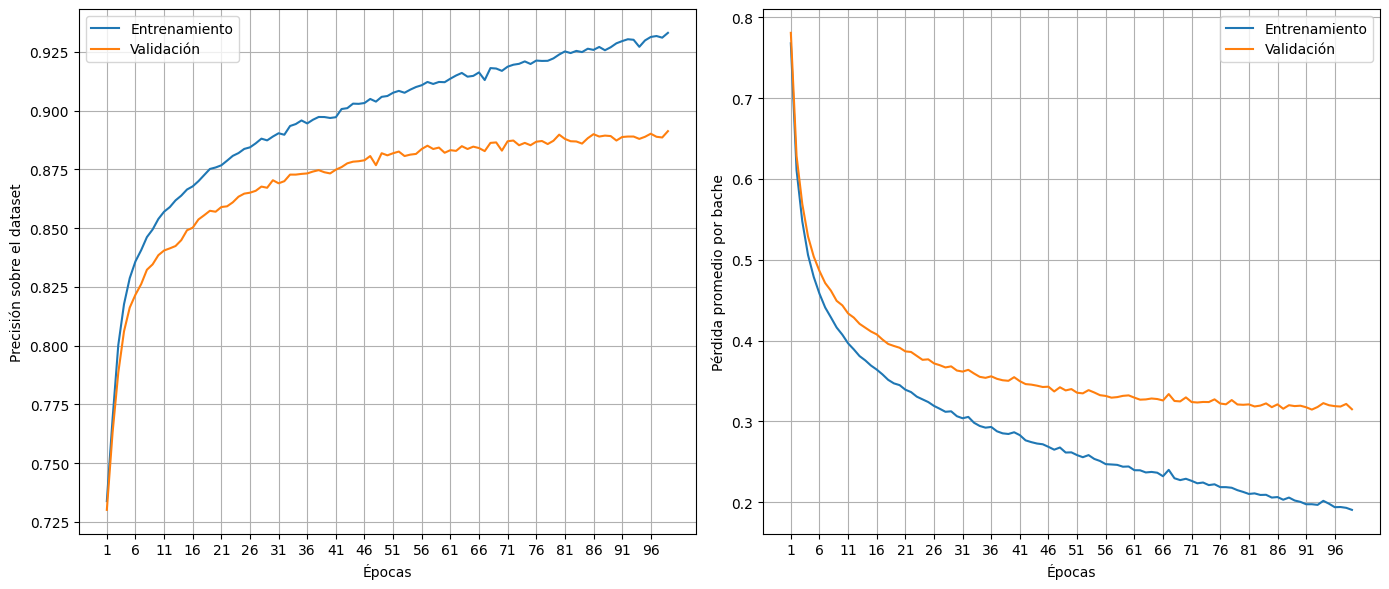

In [ ]:
config_metrics_plots(config, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch)

In [ ]:
# import shutil
# to_remove = [
#     "/content/experiments/experiment_20241120_023334",
#     "/content/experiments/Experimento1",
# ]

# for path in to_remove:
#     shutil.rmtree(path)

## **Experimento 2**
* Modifico optimizador: `SGD` ➡ `Adam`
* Modifico dropout: `0.2` ➡ `0.3`

In [ ]:
n1 = 128
n2 = 64
p = 0.3
activation = nn.ReLU()

model = NeuralNetwork(n1, n2, p, activation)

learning_rate = 10e-3
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

batch_size = 100
epochs = 100

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_data,     batch_size=batch_size, shuffle=True)

config = {
    "n1": n1,
    "n2": n2,
    "p":  p,
    "activation": "ReLU",
    "learning_rate": learning_rate,
    "batch_size": batch_size,
    "epochs": epochs,
    "optimizer": "Adam"
}

In [ ]:
best_model, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch = train_validate_loop(
    model, train_dataloader, valid_dataloader, loss_fn, optimizer, epochs
)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1
Batch 0 of 600. Loss in batch: 2.3160
Batch 100 of 600. Loss in batch: 0.6961
Batch 200 of 600. Loss in batch: 0.4395
Batch 300 of 600. Loss in batch: 0.7732
Batch 400 of 600. Loss in batch: 0.6267
Batch 500 of 600. Loss in batch: 0.4182
Train avg loss: 0.4847 | Train accuracy: 0.8223
Valid avg loss: 0.5180 | Valid accuracy: 0.8130
----------------------------------------------------------------
Epoch 2
Batch 0 of 600. Loss in batch: 0.6858
Batch 100 of 600. Loss in batch: 0.5380
Batch 200 of 600. Loss in batch: 0.4245
Batch 300 of 600. Loss in batch: 0.6769
Batch 400 of 600. Loss in batch: 0.6613
Batch 500 of 600. Loss in batch: 0.7099
Train avg loss: 0.4516 | Train accuracy: 0.8403
Valid avg loss: 0.4981 | Valid accuracy: 0.8242
----------------------------------------------------------------
Epoch 3
Batch 0 of 600. Loss in batch: 0.6867
Batch 100 of 600. Loss in batch: 0.6527
Batch 200 of 600. Loss in batch: 0.4255
Batch 300 of 600. Loss in batch: 0.5317
Batch 400 of 600. Lo

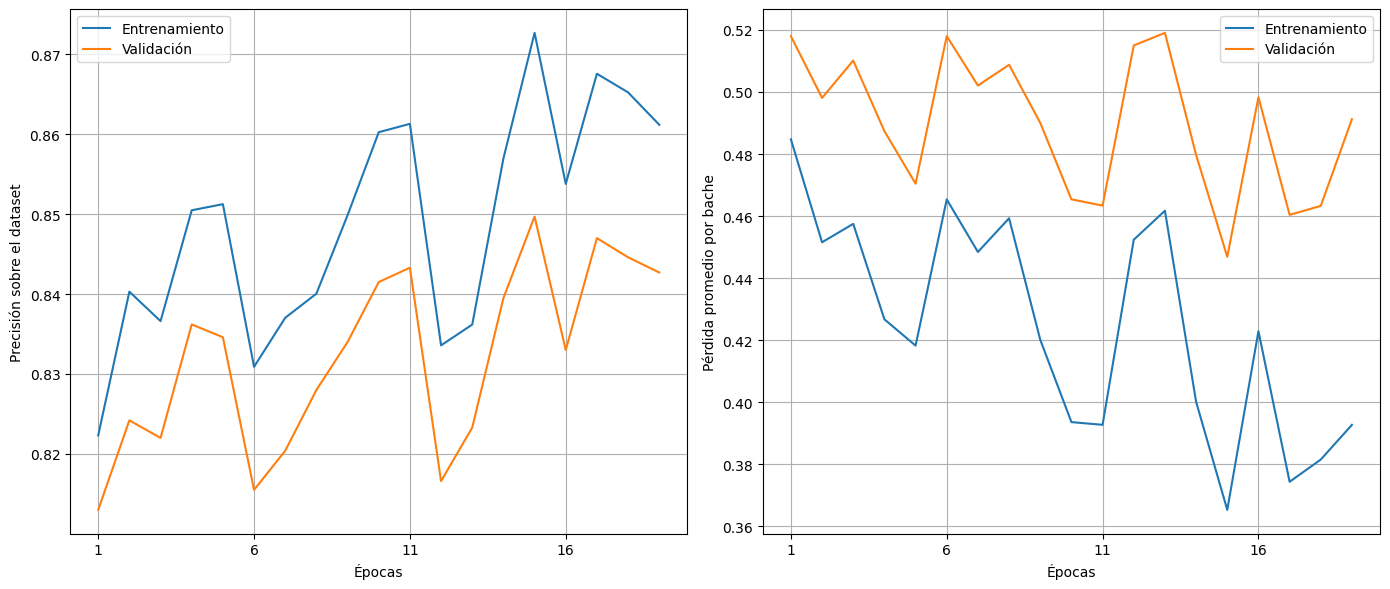

In [ ]:
config_metrics_plots(config, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch)

## **Experimento 3**
Modificaciones del Experimento 2:
* Modifico optimizador: `SGD` ➡ `Adam`
* Modifico dropout: `0.2` ➡ `0.3`

Nuevas modificaciones:
* Batch size: `100` ➡ `200`
* Learning rate: `10e-3` ➡ `10e-4`

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1
Batch 0 of 600. Loss in batch: 2.3282
Batch 100 of 600. Loss in batch: 0.7412
Batch 200 of 600. Loss in batch: 0.6759
Batch 300 of 600. Loss in batch: 0.5699
Batch 400 of 600. Loss in batch: 0.5030
Batch 500 of 600. Loss in batch: 0.5755
Train avg loss: 0.4316 | Train accuracy: 0.8430
Valid avg loss: 0.4701 | Valid accuracy: 0.8278
----------------------------------------------------------------
Epoch 2
Batch 0 of 600. Loss in batch: 0.5036
Batch 100 of 600. Loss in batch: 0.3508
Batch 200 of 600. Loss in batch: 0.4769
Batch 300 of 600. Loss in batch: 0.4459
Batch 400 of 600. Loss in batch: 0.4059
Batch 500 of 600. Loss in batch: 0.4902
Train avg loss: 0.3783 | Train accuracy: 0.8625
Valid avg loss: 0.4235 | Valid accuracy: 0.8480
----------------------------------------------------------------
Epoch 3
Batch 0 of 600. Loss in batch: 0.4085
Batch 100 of 600. Loss in batch: 0.5228
Batch 200 of 600. Loss in batch: 0.3183
Batch 300 of 600. Loss in batch: 0.4272
Batch 400 of 600. Lo

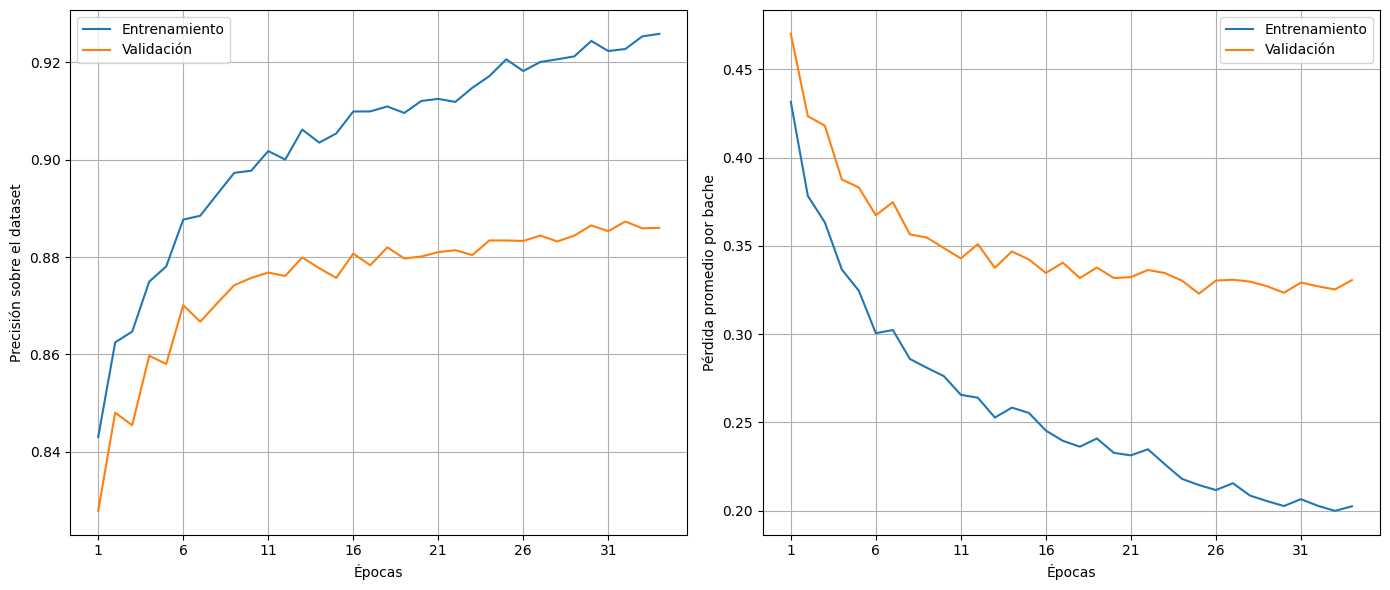

In [ ]:
n1 = 128
n2 = 64
p = 0.3
activation = nn.ReLU()

model = NeuralNetwork(n1, n2, p, activation)

learning_rate = 10e-4
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

batch_size = 200
epochs = 100

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_data,     batch_size=batch_size, shuffle=True)

config = {
    "n1": n1,
    "n2": n2,
    "p":  p,
    "activation": "ReLU",
    "learning_rate": learning_rate,
    "batch_size": batch_size,
    "epochs": epochs,
    "optimizer": "Adam"
}

best_model, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch = train_validate_loop(
    model, train_dataloader, valid_dataloader, loss_fn, optimizer, epochs
)

config_metrics_plots(config, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch)

## **Experimento 4**
Modificaciones del Experimento 2:
* Modifico optimizador: `SGD` ➡ `Adam`
* Modifico dropout: `0.2` ➡ `0.3`

Modificaciones del Experimento 3:
* Batch size: `100` ➡ `200`
* Learning rate: `10e-3` ➡ `10e-4`

Nuevas modificaciones:
* n1: `128` ➡ `64`
* n2: `64` ➡ `32`

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1
Batch 0 of 600. Loss in batch: 2.3162
Batch 100 of 600. Loss in batch: 0.9190
Batch 200 of 600. Loss in batch: 0.7121
Batch 300 of 600. Loss in batch: 0.6876
Batch 400 of 600. Loss in batch: 0.5719
Batch 500 of 600. Loss in batch: 0.6407
Train avg loss: 0.4613 | Train accuracy: 0.8319
Valid avg loss: 0.4907 | Valid accuracy: 0.8176
----------------------------------------------------------------
Epoch 2
Batch 0 of 600. Loss in batch: 0.5841
Batch 100 of 600. Loss in batch: 0.5652
Batch 200 of 600. Loss in batch: 0.8770
Batch 300 of 600. Loss in batch: 0.5390
Batch 400 of 600. Loss in batch: 0.4630
Batch 500 of 600. Loss in batch: 0.6198
Train avg loss: 0.4075 | Train accuracy: 0.8483
Valid avg loss: 0.4451 | Valid accuracy: 0.8313
----------------------------------------------------------------
Epoch 3
Batch 0 of 600. Loss in batch: 0.4215
Batch 100 of 600. Loss in batch: 0.4598
Batch 200 of 600. Loss in batch: 0.5250
Batch 300 of 600. Loss in batch: 0.7039
Batch 400 of 600. Lo

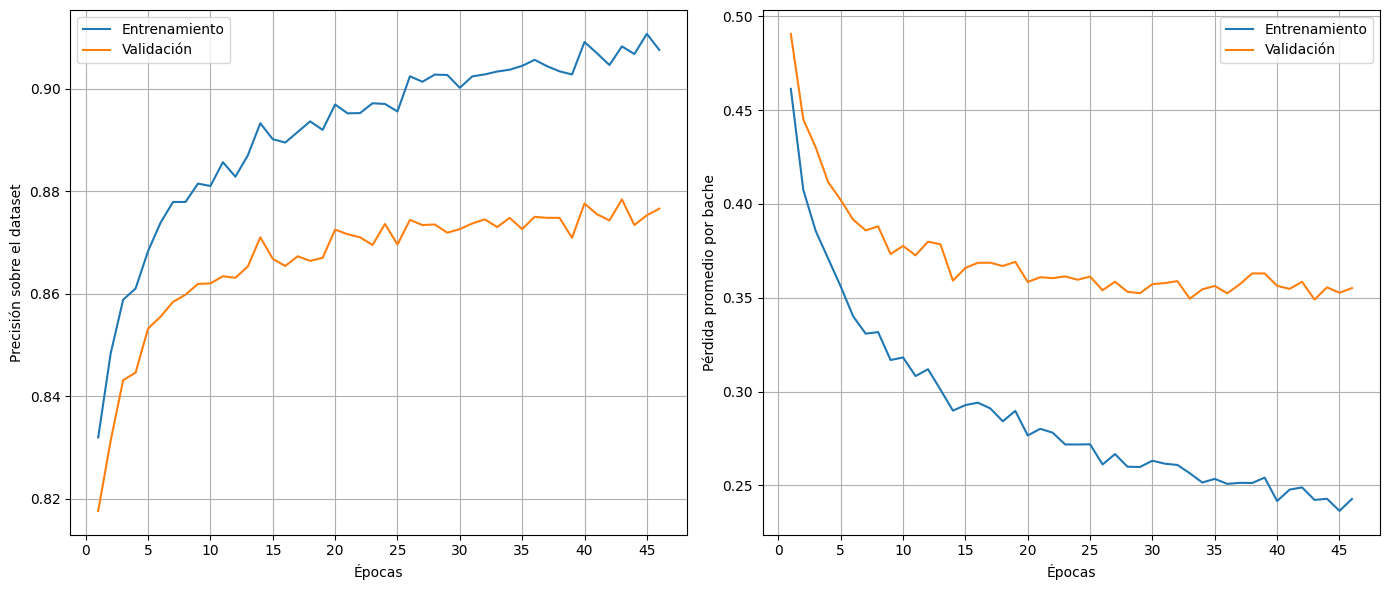

In [47]:
n1 = 64
n2 = 32
p = 0.3
activation = nn.ReLU()

model = NeuralNetwork(n1, n2, p, activation)

learning_rate = 10e-4
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

batch_size = 200
epochs = 100

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_data,     batch_size=batch_size, shuffle=True)

config = {
    "n1": n1,
    "n2": n2,
    "p":  p,
    "activation": "ReLU",
    "learning_rate": learning_rate,
    "batch_size": batch_size,
    "epochs": epochs,
    "optimizer": "Adam"
}

best_model, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch = train_validate_loop(
    model, train_dataloader, valid_dataloader, loss_fn, optimizer, epochs
)

config_metrics_plots(config, train_accs, train_avg_losses, valid_accs, valid_avg_losses, best_epoch)